In [4]:
import pandas as pd
df = pd.read_csv('train.csv')
df1=df.drop('id',axis=1)
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

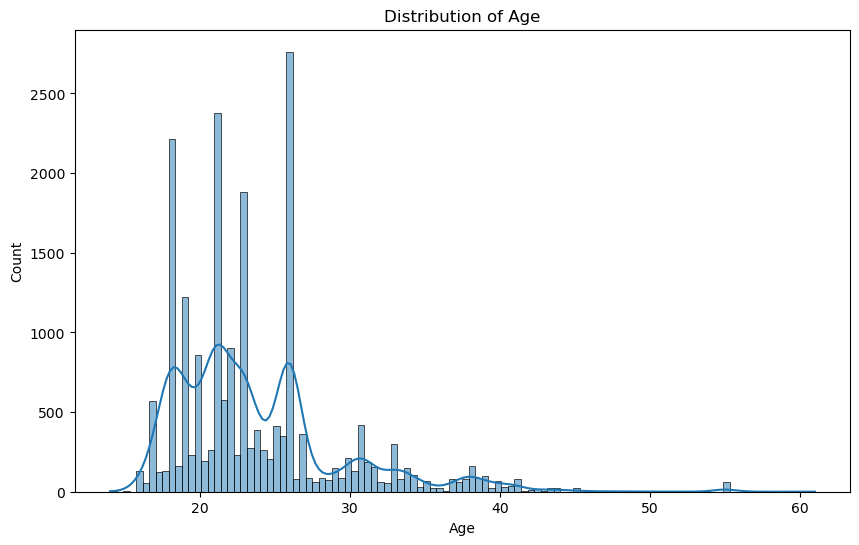

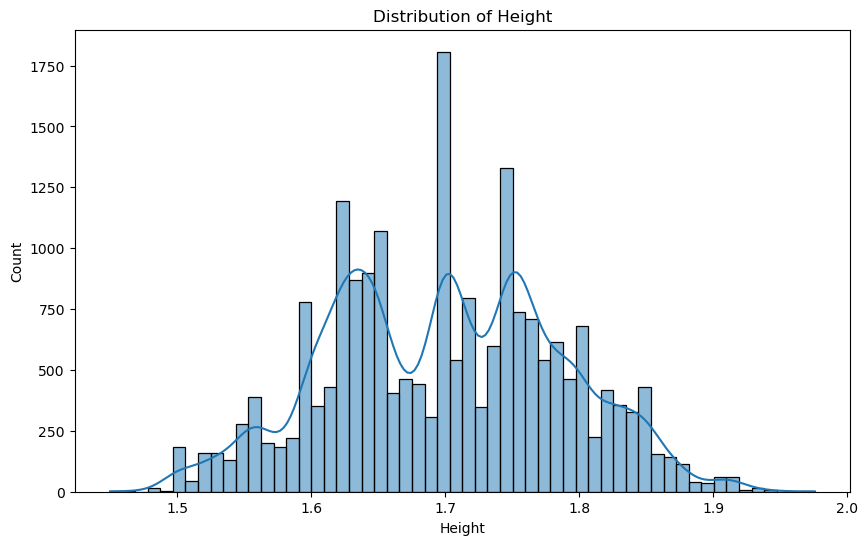

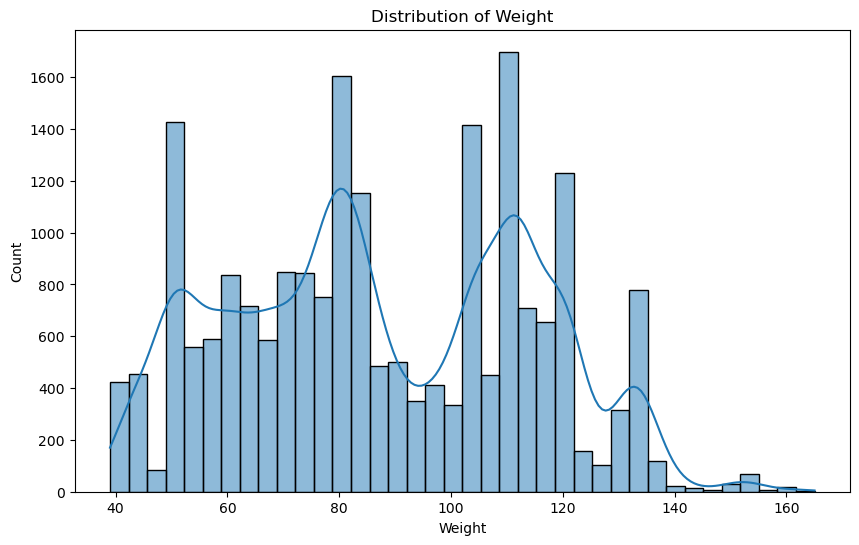

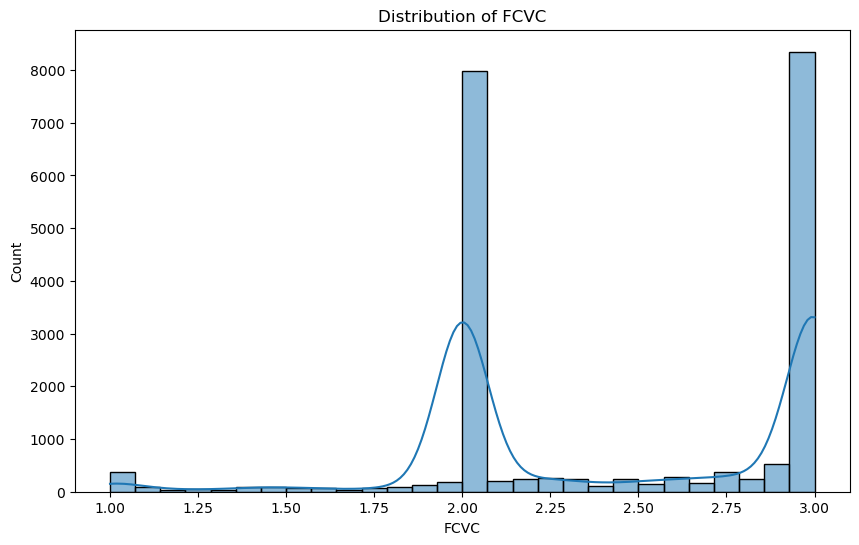

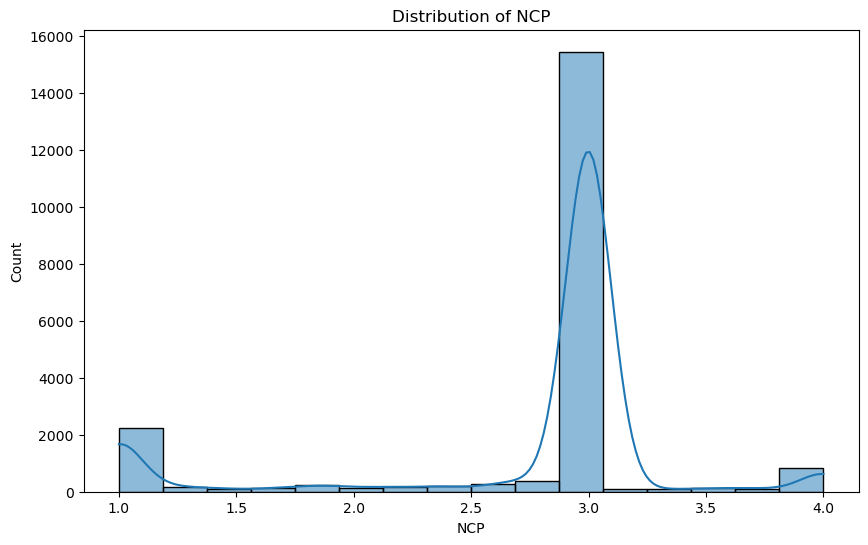

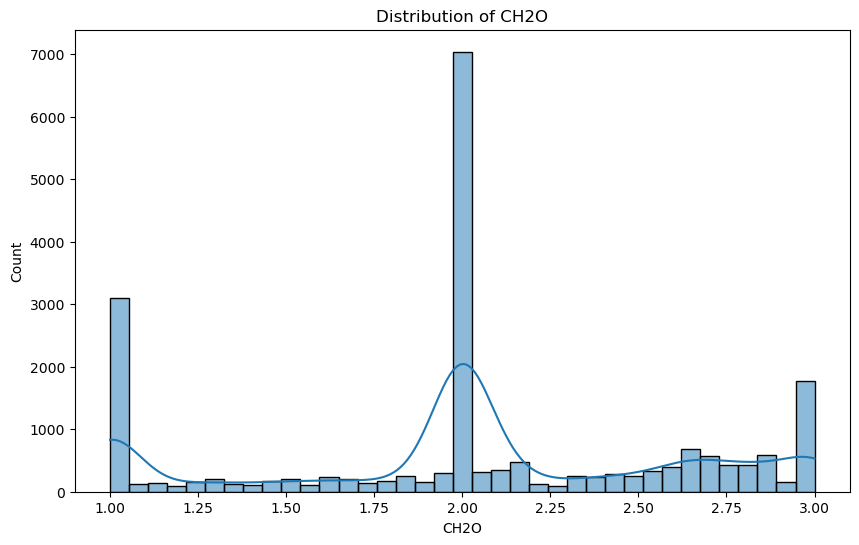

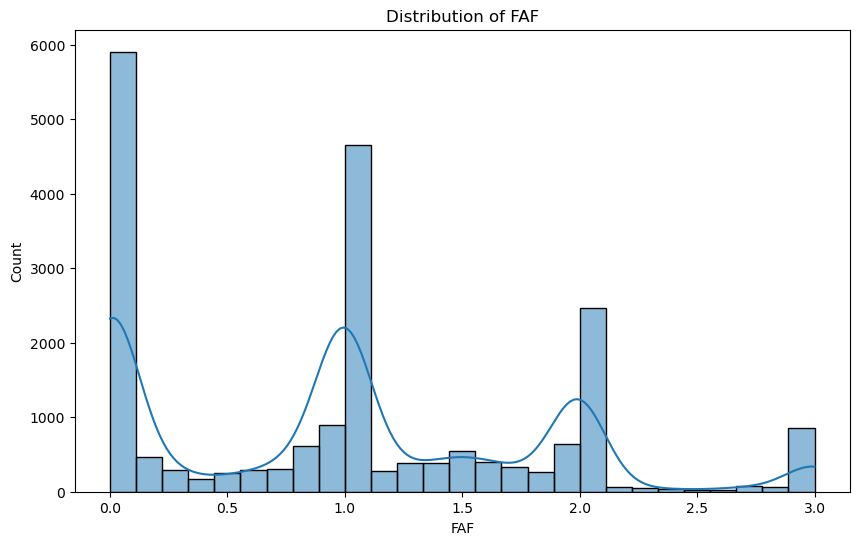

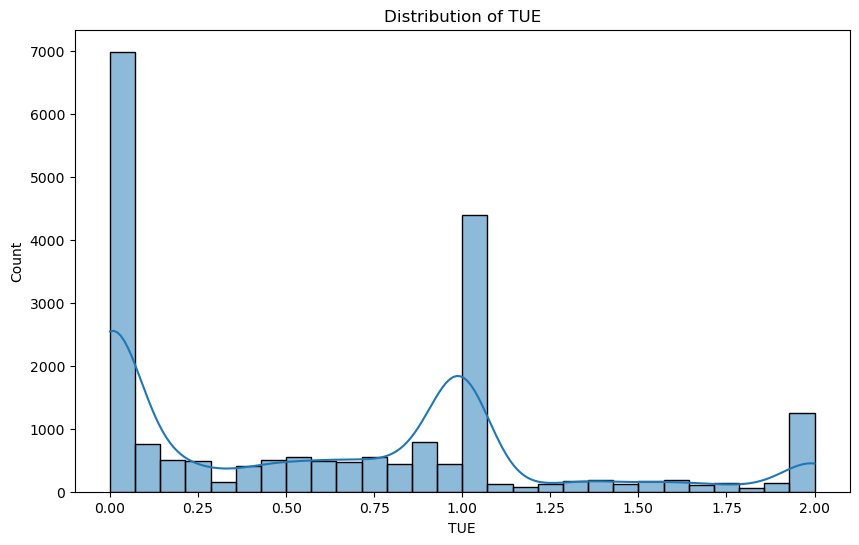

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Distribution plots

for column in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

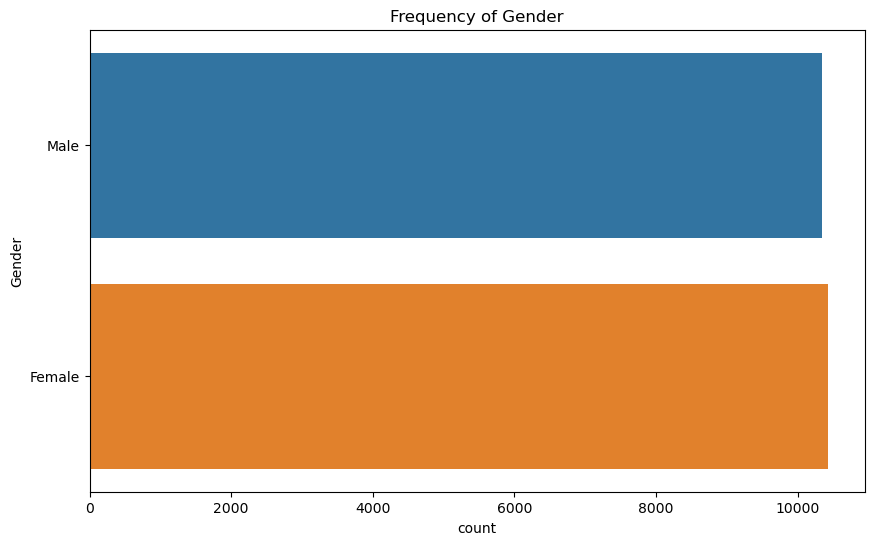

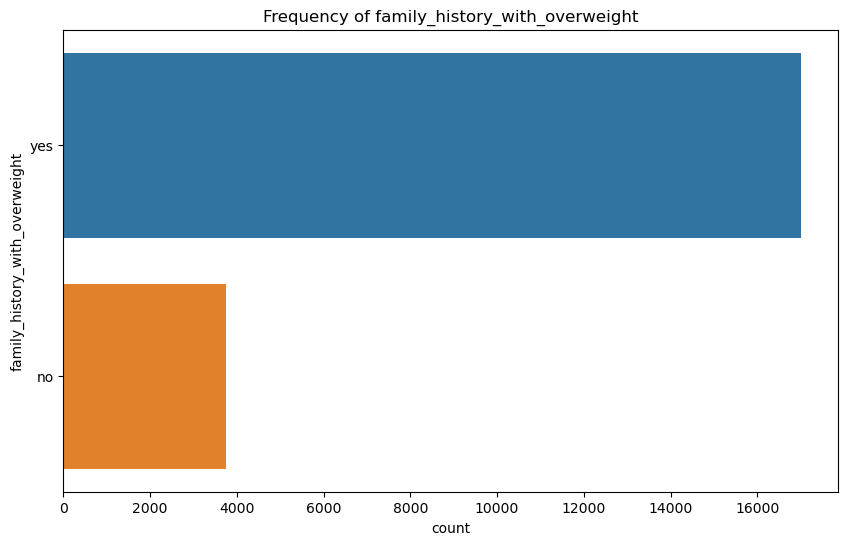

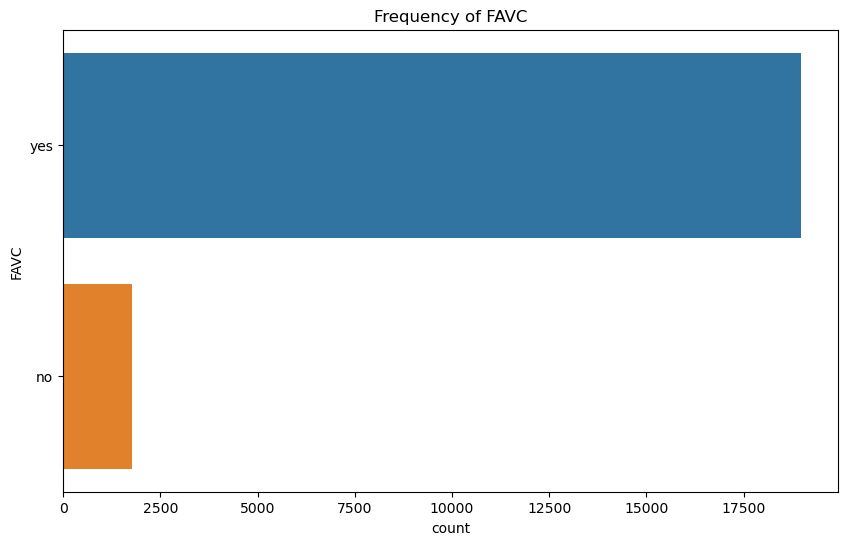

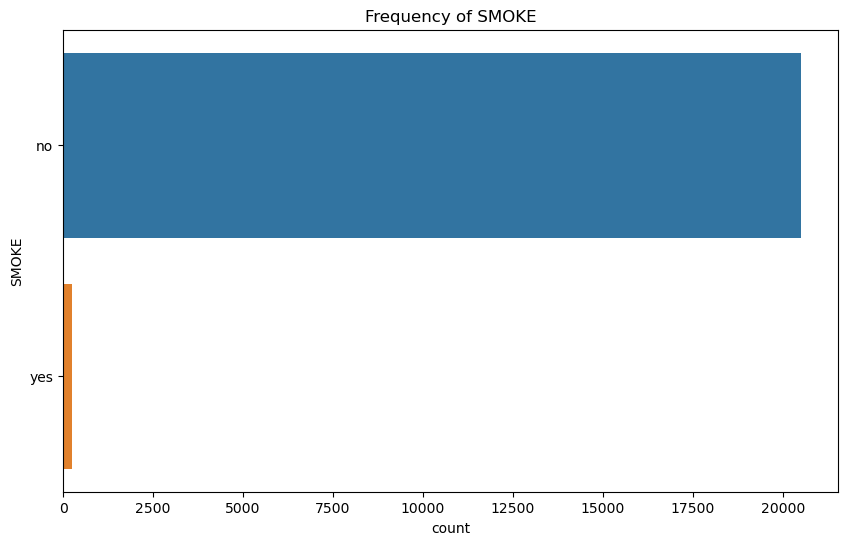

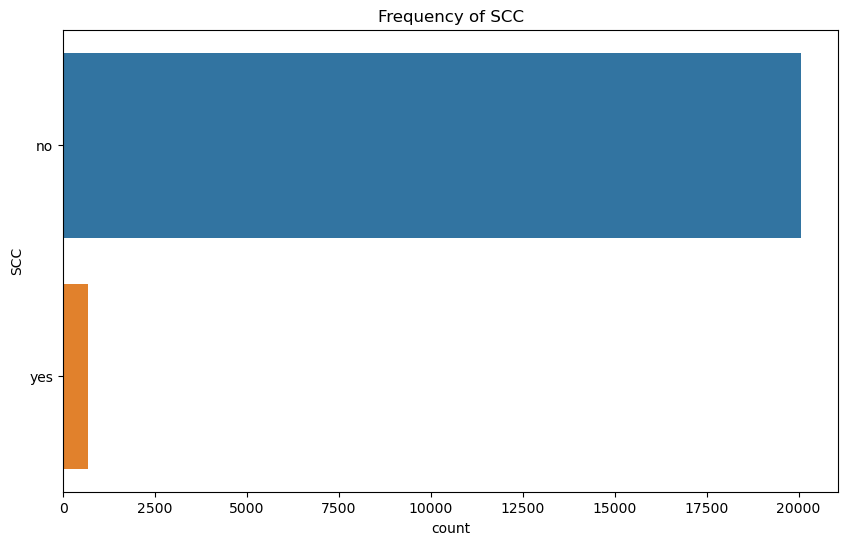

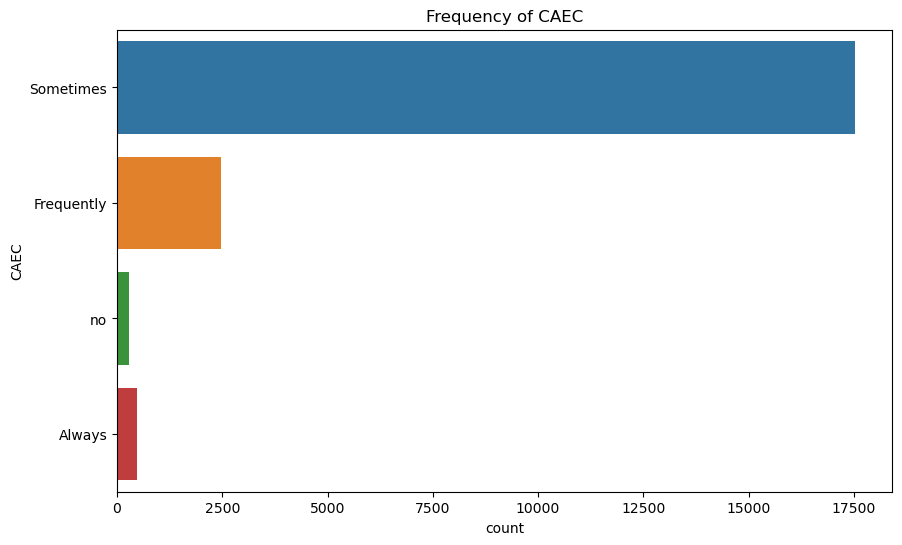

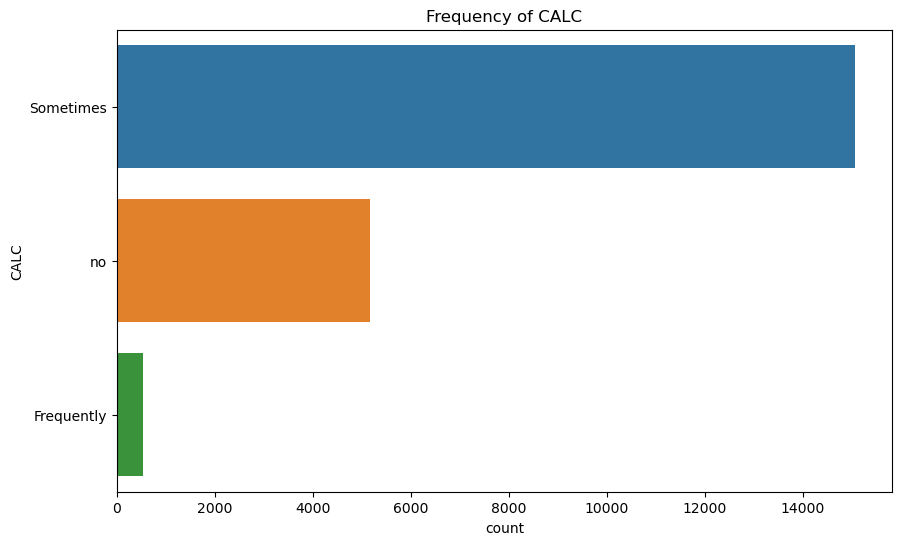

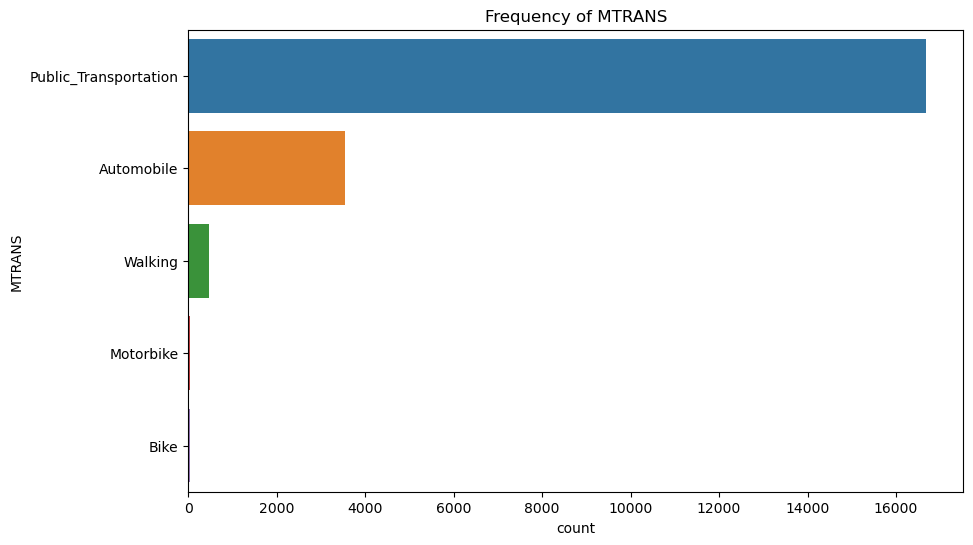

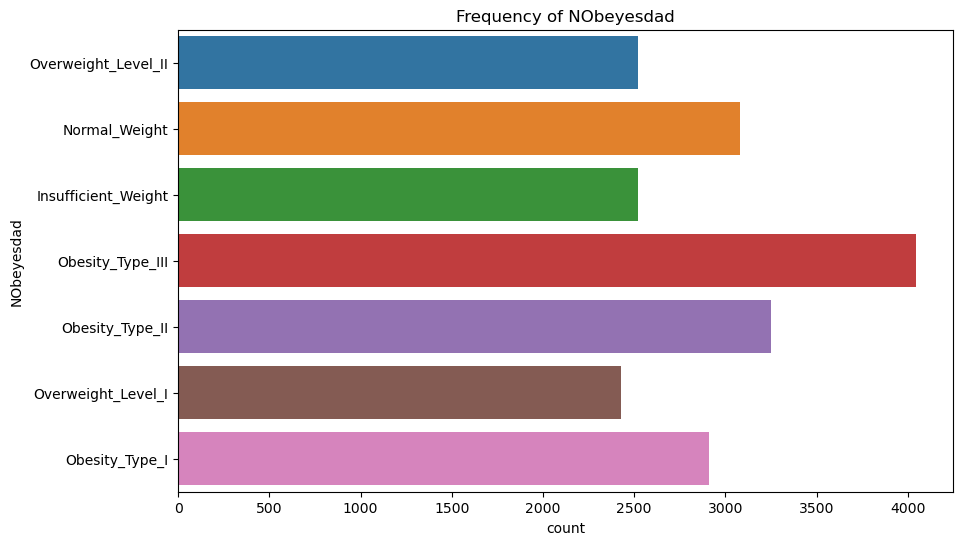

In [7]:
for column in ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS','NObeyesdad']:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df1)
    plt.title(f'Frequency of {column}')
    plt.show()

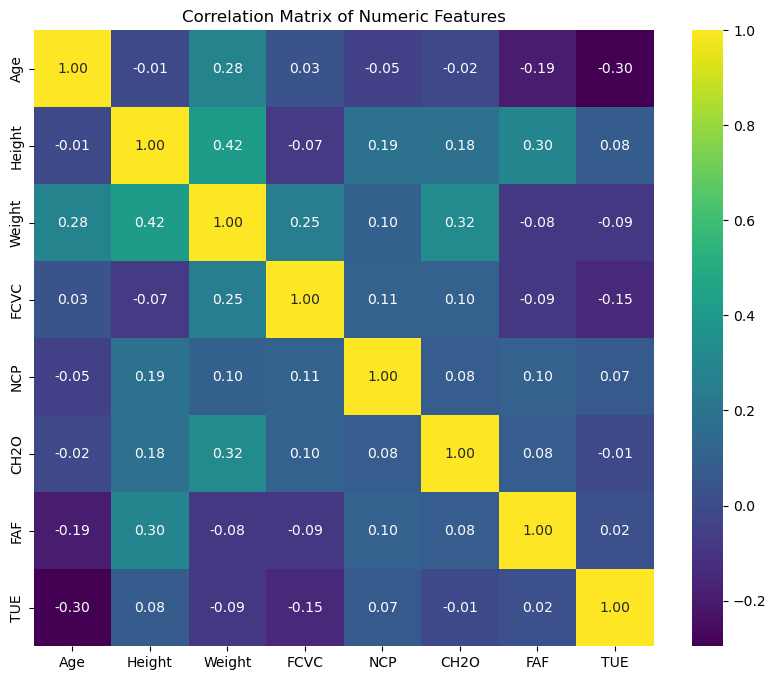

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [9]:
numeric_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Dictionary to hold outlier indices for each numeric feature
outliers_indices = {}

for feature in numeric_features:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying indices of outliers
    outlier_idx = df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)].index
    
    # Adding indices to the dictionary
    outliers_indices[feature] = outlier_idx

    # Optionally, print the number of outliers for each feature
    print(f"{feature} has {len(outlier_idx)} outliers")

Age has 1074 outliers
Height has 4 outliers
Weight has 0 outliers
FCVC has 0 outliers
NCP has 6052 outliers
CH2O has 0 outliers
FAF has 0 outliers
TUE has 0 outliers


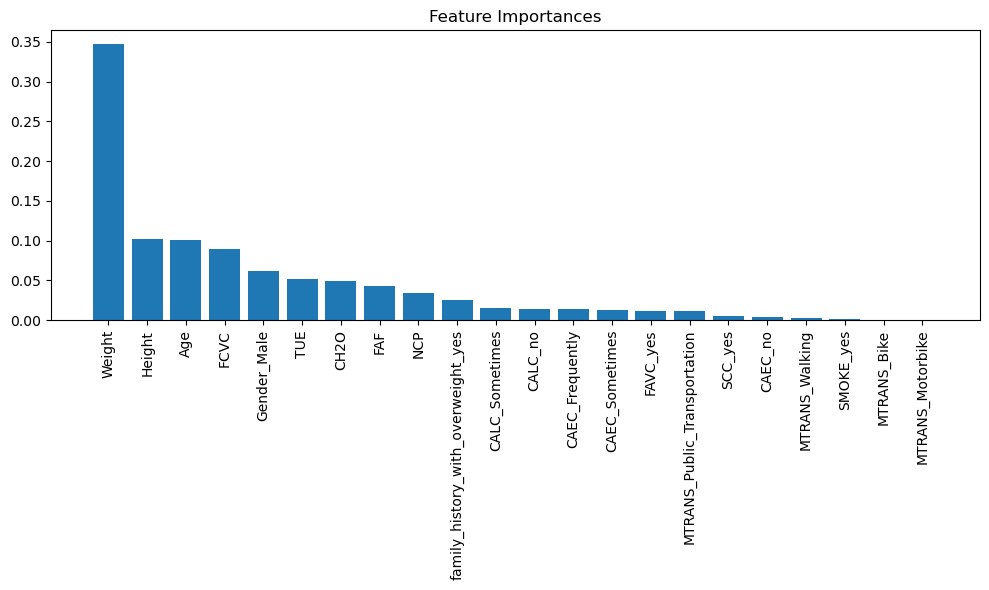

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1 is your DataFrame
X = df1.drop('NObeyesdad', axis=1)  # Features
y = df1['NObeyesdad']  # Target variable

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode the target variable if it's not numerical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
#Using multiple model - Trial 1

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('train.csv')  # replace with your local path to train.csv

# Assuming 'target' is the column with weight categories and the rest are features
X = df.drop(['NObeyesdad','id'], axis=1)
y = df['NObeyesdad']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing for numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the models
models = [
    ('LogisticRegression', LogisticRegression(max_iter=1000)),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=100))
]

# Dictionary to store the best model and its score
best_model = None
best_score = 0
best_params = None

# For each model, create a full pipeline with preprocessor and the model, and perform grid search with cross-validation
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    # Define the parameter grid to search
    param_grid = {
        'classifier__C': [0.1, 1.0, 10.0] if name == 'LogisticRegression' else None,
        'classifier__n_estimators': [50, 100, 200] if name in ['RandomForest', 'GradientBoosting'] else None
    }
    # Remove None values
    param_grid = {k: v for k, v in param_grid.items() if v is not None}
    
    search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5)
    search.fit(X_train, y_train)
    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_model = search.best_estimator_
        best_params = search.best_params_
    
    print(f"Model: {name}")
    print(f"Best parameters (CV score={search.best_score_}):")
    print(search.best_params_)

# Output the best model and its score
print("\nBest Model:", best_model)
print("Best Score:", best_score)
print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("\nTest Set Evaluation:\n")
print(classification_report(y_test, y_pred))


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Best parameters (CV score=0.8634834317438097):
{'classifier__C': 10.0}
Model: RandomForest
Best parameters (CV score=0.8923883933467739):
{'classifier__n_estimators': 100}
Model: GradientBoosting
Best parameters (CV score=0.9051552876890734):
{'classifier__n_estimators': 200}

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEnc

In [7]:
import pandas as pd

# Load the test dataset
test_df = pd.read_csv('test.csv')  # Replace with the path to your test.csv

# Here we separate the features and target variable from the test dataset
# Assuming the target variable column is named 'target' and is present in the test data
X_test = test_df.drop('id', axis=1)

# Preprocessing and prediction using the best_model pipeline
# Since best_model is a pipeline that includes both preprocessing and the classifier,
# we can directly call predict on the raw features
y_pred = best_model.predict(X_test)

# The y_pred now contains the predicted classes for your test data
# You can now output this to a CSV file or use it as needed
test_df['NObeyesdad'] = y_pred

# If you want to save the predictions to a CSV file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'NObeyesdad': y_pred
})

In [14]:
submission_df['NObeyesdad'].value_counts()

Obesity_Type_III       2624
Obesity_Type_II        2118
Normal_Weight          2095
Obesity_Type_I         2057
Overweight_Level_II    1777
Insufficient_Weight    1717
Overweight_Level_I     1452
Name: NObeyesdad, dtype: int64

In [ ]:
#usin Xgb - Trial 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('train.csv')  # Adjust the path as necessary

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['NObeyesdad'])

# Preparing the dataset
X = df.drop(['NObeyesdad', 'id'], axis=1)  # Assuming 'id' is not used as a feature

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Lists of columns by type
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Initialize XGBClassifier
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', xgb_model)])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

# Randomized search
search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

# Output the best results
print("Best Score:", search.best_score_)
print("Best Params:", search.best_params_)

# Evaluation on the test set
y_pred = search.predict(X_test)
print("\nTest Set Evaluation:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Best Score: 0.9101533832918101
Best Params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Test Set Evaluation:

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.88      0.90      0.89       626
     Obesity_Type_I       0.89      0.88      0.89       543
    Obesity_Type_II       0.98      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.80      0.79      0.79       484
Overweight_Level_II       0.80      0.82      0.81       514

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('train.csv')  # Adjust the path as necessary

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['NObeyesdad'])

# Preparing the dataset
X = df.drop(['NObeyesdad', 'id'], axis=1)  # Assuming 'id' is not used as a feature

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Lists of columns by type
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Adding polynomial features
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Initialize XGBClassifier with regularization parameters
xgb_model = XGBClassifier(eval_metric='mlogloss', 
                          use_label_encoder=False,
                          reg_lambda=1.0,  # L2 regularization term on weights, increase to make model more conservative.
                          reg_alpha=0.0)  # L1 regularization term on weights, increase to make model more conservative.

# Complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', xgb_model)])

# Hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 4, 5],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1],
    'classifier__reg_lambda': [0.01, 0.1, 1.0],  # Adding L2 regularization to the grid search
    'classifier__reg_alpha': [0.01, 0.1, 1.0]  # Adding L1 regularization to the grid search
}

# GridSearchCV
search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

# Output the best results
print("Best Score:", search.best_score_)
print("Best Params:", search.best_params_)

# Evaluation on the test set
y_pred = search.predict(X_test)
print("\nTest Set Evaluation:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Best Score: 0.9070219777052276
Best Params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 200, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 0.01, 'classifier__subsample': 1}

Test Set Evaluation:

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       524
      Normal_Weight       0.87      0.89      0.88       626
     Obesity_Type_I       0.88      0.86      0.87       543
    Obesity_Type_II       0.97      0.98      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.79      0.78      0.78       484
Overweight_Level_II       0.79      0.81      0.80       514

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



In [ ]:
#using Neural Network - Trial 3

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')  # Adjust the path as necessary

# Check if 'id' column exists and drop it if it does
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['NObeyesdad'])
y_categorical = to_categorical(y_encoded)  # Convert labels to categorical

# Lists of columns by type
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('NObeyesdad')  # Exclude target variable

# Preparing the dataset
X = df.drop(['NObeyesdad'], axis=1)  # Now we're not dropping 'id' here as it's already checked and dropped above

# Define transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Column transformer to apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_categorical, test_size=0.2, random_state=42)

# Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer size = number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluation on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nTest Set Loss: {loss}, Accuracy: {accuracy}')

# Convert predictions to labels for classification report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print(report)


Epoch 1/100
416/416 [==============================] - 5s 4ms/step - loss: 0.7667 - accuracy: 0.7189 - val_loss: 0.4465 - val_accuracy: 0.8414
Epoch 2/100
416/416 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.8488 - val_loss: 0.3725 - val_accuracy: 0.8685
Epoch 3/100
416/416 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8638 - val_loss: 0.3558 - val_accuracy: 0.8784
Epoch 4/100
416/416 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8665 - val_loss: 0.3444 - val_accuracy: 0.8757
Epoch 5/100
416/416 [==============================] - 1s 3ms/step - loss: 0.3730 - accuracy: 0.8681 - val_loss: 0.3403 - val_accuracy: 0.8769
Epoch 6/100
416/416 [==============================] - 1s 3ms/step - loss: 0.3631 - accuracy: 0.8730 - val_loss: 0.3406 - val_accuracy: 0.8751
Epoch 7/100
416/416 [==============================] - 1s 3ms/step - loss: 0.3552 - accuracy: 0.8741 - val_loss: 0.3359 - val_accuracy: 0.8778

Epoch 58/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.9110 - val_loss: 0.3521 - val_accuracy: 0.8793
Epoch 59/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2465 - accuracy: 0.9119 - val_loss: 0.3462 - val_accuracy: 0.8859
Epoch 60/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9115 - val_loss: 0.3554 - val_accuracy: 0.8784
Epoch 61/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2459 - accuracy: 0.9125 - val_loss: 0.3467 - val_accuracy: 0.8826
Epoch 62/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2435 - accuracy: 0.9121 - val_loss: 0.3496 - val_accuracy: 0.8835
Epoch 63/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2399 - accuracy: 0.9130 - val_loss: 0.3493 - val_accuracy: 0.8847
Epoch 64/100
416/416 [==============================] - 1s 3ms/step - loss: 0.2383 - accuracy: 0.9152 - val_loss: 0.3561 - val_accuracy: